In [33]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train.csv", low_memory=False)

In [3]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
total_rows=len(df.axes[0]) 
total_cols=len(df.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

sz = Path('Train.csv').stat().st_size
gb_sz = sz/1000000000
print("The file is", sz, "bytes or", gb_sz, "gigabytes")

Number of Rows: 13647309
Number of Columns: 48
The file is 2292759599 bytes or 2.292759599 gigabytes


In [5]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [6]:
df.rename(columns={'fecha_dato':'Partitioned Date',
                    'ncodpers':'Customer Code',
                    'ind_empleado':'Employee Index',
                    'pais_residencia':'Country Residence',
                    'sexo':'Sex',
                    'age':'Age',
                    'fecha_alta':'Date Joined',
                    'ind_nuevo':'New Customer Index',
                    'antiguedad':'Customer Seniority',
                    'indrel':'Primary Customer',
                    'ult_fec_cli_1t':'Last Date as Primary Customer',
                    'indrel_1mes':'Customer Type at Beginning of Month',
                    'tiprel_1mes':'Customer Relation Type at Beginning of Month',
                    'indresi':'Resident Country is Bank Country',
                    'indext':'Birth Country Different Than Bank Country',
                    'conyuemp':'Spouse Index', 
                    'canal_entrada':'Channel Used to Join', 
                    'indfall':'Deceased', 
                    'tipodom':'Address Type', 
                    'cod_prov':'Province Code',
                    'nomprov':'Province Name', 
                    'ind_actividad_cliente':'Active Customer', 
                    'renta':'Gross Household Income', 
                    'segmento':'Segmentation',
                    'ind_ahor_fin_ult1':'Savings Account',
                    'ind_aval_fin_ult1':'Guarantees', 
                    'ind_cco_fin_ult1':'Current Accounts',
                    'ind_cder_fin_ult1':'Derivada Account', 
                    'ind_cno_fin_ult1':'Payroll Account', 
                    'ind_ctju_fin_ult1':'Junior Account',
                    'ind_ctma_fin_ult1':'Mas Partiuclar Account', 
                    'ind_ctop_fin_ult1':'Particular Account', 
                    'ind_ctpp_fin_ult1':'Particular Plus Account',
                    'ind_deco_fin_ult1':'Short-Term Deposits',
                    'ind_deme_fin_ult1':'Medium-Term Deposits', 
                    'ind_dela_fin_ult1':'Long-Term Deposits',
                    'ind_ecue_fin_ult1':'E-Account',
                    'ind_fond_fin_ult1':'Funds', 
                    'ind_hip_fin_ult1':'Mortgage',
                    'ind_plan_fin_ult1':'Pensions', 
                    'ind_pres_fin_ult1':'Loans', 
                    'ind_reca_fin_ult1':'Taxes',
                    'ind_tjcr_fin_ult1':'Credit Card', 
                    'ind_valo_fin_ult1':'Securities', 
                    'ind_viv_fin_ult1':'Home Account',
                    'ind_nomina_ult1':'Payroll', 
                    'ind_nom_pens_ult1':'Pension', 
                    'ind_recibo_ult1':'Direct Debit'}, inplace = True)

In [7]:
df

,Partitioned Date,Customer Code,Employee Index,Country Residence,Sex,Age,Date Joined,New Customer Index,Customer Seniority,Primary Customer,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
df.dtypes

Partitioned Date                                 object
Customer Code                                     int64
Employee Index                                   object
Country Residence                                object
Sex                                              object
Age                                              object
Date Joined                                      object
New Customer Index                              float64
Customer Seniority                               object
Primary Customer                                float64
Last Date as Primary Customer                    object
Customer Type at Beginning of Month              object
Customer Relation Type at Beginning of Month     object
Resident Country is Bank Country                 object
Birth Country Different Than Bank Country        object
Spouse Index                                     object
Channel Used to Join                             object
Deceased                                        

In [9]:
 df.isna().sum()

Partitioned Date                                       0
Customer Code                                          0
Employee Index                                     27734
Country Residence                                  27734
Sex                                                27804
Age                                                    0
Date Joined                                        27734
New Customer Index                                 27734
Customer Seniority                                     0
Primary Customer                                   27734
Last Date as Primary Customer                   13622516
Customer Type at Beginning of Month               149781
Customer Relation Type at Beginning of Month      149781
Resident Country is Bank Country                   27734
Birth Country Different Than Bank Country          27734
Spouse Index                                    13645501
Channel Used to Join                              186126
Deceased                       

In [10]:
df['Gross Household Income'].mean()

134254.31823814093

In [11]:
df['Gross Household Income'].median()

101850.0

In [12]:
min(df['Gross Household Income'])

1202.73

In [13]:
max(df['Gross Household Income'])

28894395.51

In [14]:
df['Sex'].mode()

0    V
Name: Sex, dtype: object

In [15]:
df['Customer Type at Beginning of Month'].mode()

0    1.0
Name: Customer Type at Beginning of Month, dtype: object

In [31]:
df['Customer Type at Beginning of Month'].unique()

array(['1.0', '1', nan, '3.0', '3', '2', '2.0', '4.0', 'P', '4'],
      dtype=object)

In [17]:
df['Customer Type at Beginning of Month'].nunique()

9

In [25]:
df['Gross Household Income'].nlargest(n=100)

327991     28894395.51
332909     28894395.51
344184     28894395.51
903902     28894395.51
919787     28894395.51
              ...     
2500896    24253236.93
2531661    24253236.93
3160166    24253236.93
3906721    24253236.93
4387351    24253236.93
Name: Gross Household Income, Length: 100, dtype: float64

In [26]:
df['Gross Household Income'].nsmallest(n=100)

280346     1202.73
950236     1202.73
1570122    1202.73
2199247    1202.73
2823646    1202.73
            ...   
5539437    3796.86
5766988    3796.86
5783021    3796.86
6856407    3796.86
6868095    3796.86
Name: Gross Household Income, Length: 100, dtype: float64

C:\Users\Colt\AppData\Local\Temp\ipykernel_1864\3797560459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gross Household Income'])


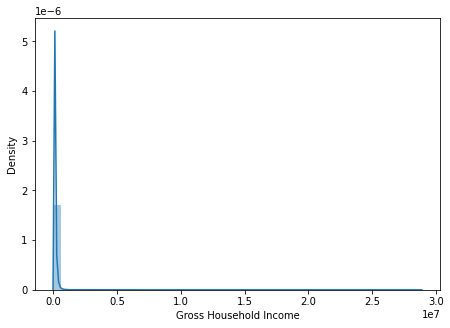

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['Gross Household Income'])
plt.show()

In [40]:
print("Highest allowed",df['Gross Household Income'].mean() + 3*df['Gross Household Income'].std())
print("Lowest allowed",df['Gross Household Income'].mean() - 3*df['Gross Household Income'].std())

Highest allowed 826115.0347038
Lowest allowed -557606.3982275182


In [50]:
df[(df['Gross Household Income'] > 826115.03) | (df['Gross Household Income'] < 0.)]

,Partitioned Date,Customer Code,Employee Index,Country Residence,Sex,Age,Date Joined,New Customer Index,Customer Seniority,Primary Customer,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
467,2015-01-28,1050426,N,ES,H,25,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
822,2015-01-28,1052362,N,ES,V,22,2012-08-17,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1151,2015-01-28,1051383,N,ES,V,53,2012-08-13,0.0,35,1.0,...,0,0,0,1,0,0,0,0.0,0.0,1
1742,2015-01-28,1048801,N,ES,H,23,2012-08-09,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1744,2015-01-28,1048803,N,ES,V,26,2012-08-09,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13644850,2016-05-28,1164027,N,ES,V,27,2013-08-12,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
13645267,2016-05-28,1164544,N,ES,H,22,2013-08-13,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13645403,2016-05-28,1164697,N,ES,V,23,2013-08-13,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13645545,2016-05-28,1167675,N,ES,H,22,2013-08-20,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [56]:
new_df = df[(df['Gross Household Income'] < 250000) & (df['Gross Household Income'] > 0)]

In [43]:
upper_limit = df['Gross Household Income'].mean() + 3*df['Gross Household Income'].std()
lower_limit = df['Gross Household Income'].mean() - 3*df['Gross Household Income'].std()

In [59]:
df['Gross Household Income'] = np.where(df['Gross Household Income']>upper_limit,
    upper_limit, np.where(df['Gross Household Income']<lower_limit,
    lower_limit, df['Gross Household Income']))

In [60]:
df['Gross Household Income'].describe()

count    1.085293e+07
mean     1.297296e+05
std      1.013358e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      8.261150e+05
Name: Gross Household Income, dtype: float64

<AxesSubplot:>

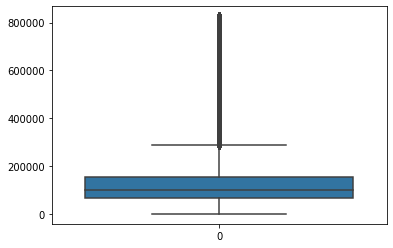

In [46]:
sns.boxplot(df['Gross Household Income'])

<AxesSubplot:>

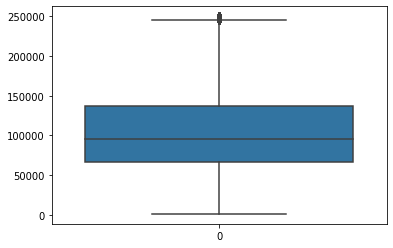

In [57]:
sns.boxplot(new_df['Gross Household Income'])